In [1]:
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf

## Problem 1

Computational graph for the following expression
$$
f = f(x,y,z) = \frac{x}{y} + z^2 + σ(x)
$$
$$
x = -1, y = 2, z = 2
$$

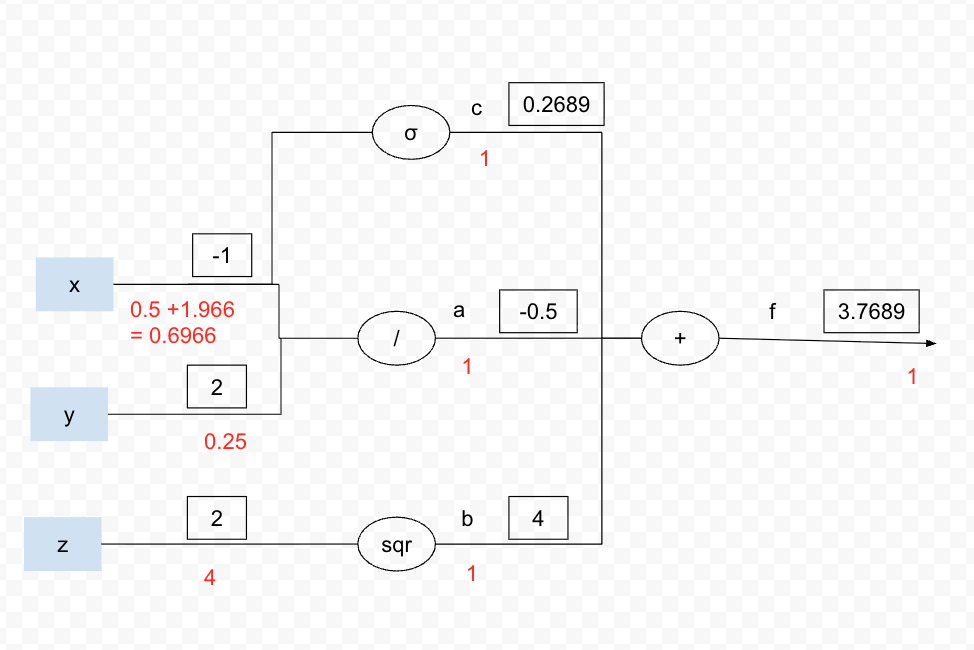

#### Forward Values:
$$
f = f(x,y,z) = \frac{x}{y} + z^2 + σ(x)
$$
$$
x = -1, y = 2, z = 2
$$
$$
Node \:a: \frac{x}{y} = \frac{-1}{2} = -0.5
$$
$$
Node \:b: Z^2 = 2^2 = 4
$$
$$
Node \:c: σ(x) = \frac{1}{1 + e^{-x}} = \frac{1}{1 + e^{--1}} = \frac{1}{1 + e} = \frac{1}{1 + 2.7183} = \frac{1}{3.7183} ≈ 0.2689
$$
$$
f = a + b + c ≈ -0.5 + 4 + 0.2689 ≈ 3.7689
$$

#### Backward Values:
$$
f = a + b + c
$$
$$
\frac{∂f}{∂a} = 1, \frac{∂f}{∂b} = 1, \frac{∂f}{∂c} = 1
$$

$$
a = \frac{x}{y}
$$
$$
\frac{∂f}{∂x}(from \:a) = \frac{∂f}{∂a} . \frac{∂a}{∂x}
$$
$$
\frac{∂a}{∂x} = \frac{∂}{∂x}(\frac{x}{y}) = \frac{1}{y} = \frac{1}{2} = 0.5
$$
$$
\therefore \frac{∂f}{∂x}(from \:a) = 1 * 0.5 = 0.5
$$

$$
\frac{∂f}{∂y}(from \:a) = \frac{∂f}{∂a} . \frac{∂a}{∂y}
$$
$$
\frac{∂a}{∂y} = \frac{∂}{∂y}(\frac{x}{y}) = \frac{-x}{y^2} = \frac{--1}{2^2} = \frac{1}{4} = 0.25
$$
$$
\therefore \frac{∂f}{∂y}(from \:a) = 1 * 0.25 = 0.25
$$

$$
b = z^2
$$
$$
\frac{∂f}{∂z} = \frac{∂f}{∂z} . \frac{∂b}{∂z}
$$
$$
\frac{∂b}{∂z} = \frac{∂}{∂z}(z^2) = 2Z = 2*2 = 4
$$
$$
\therefore \frac{∂f}{∂z} = 1 * 4 = 4
$$

$$
c = σ(x) = 0.2689
$$
$$
\frac{∂f}{∂x}(from \:c) = \frac{∂f}{∂x} . \frac{∂c}{∂x}
$$
$$
\frac{∂c}{∂x} = \frac{∂}{∂x}(σ(x)) = (1 - σ(x))σ(x) ≈ (1 - 0.2689)0.2689 ≈ 0.1966
$$
$$
\therefore \frac{∂f}{∂x}(from \:c) ≈ 1 * 0.1966 ≈ 0.1966
$$

#### Final Values:

Forward Propagation:

x = -1, y = 2, z = 2

a = -0.5, b = 4, c = 0.2689

f = 3.76899

Backward Propagation:

a = 1, b = 1, c = 1

∂f/∂x ≈ 0.5 + 0.1966 ≈ 0.6966

∂f/∂y = 0.25

∂f/∂z = 4

## Problem 2

In [2]:
# f(x, y, z) = x/y + z^2 + σ(x)
x = tf.constant(-1.0)
y = tf.constant(2.0)
z = tf.constant(2.0)

with tf.GradientTape() as tape:
    tape.watch([x, y, z])
    f = x / y + tf.square(z) + tf.sigmoid(x)
    
df_dx, df_dy, df_dz = tape.gradient(f, [x, y, z])

print("f(x,y,z) = ", f.numpy())
print("∂f/∂x = ", df_dx.numpy())
print("∂f/∂y = ", df_dy.numpy())
print("∂f/∂z = ", df_dz.numpy())

f(x,y,z) =  3.7689414
∂f/∂x =  0.69661194
∂f/∂y =  0.25
∂f/∂z =  4.0


Conclusion:
The values of the partial derivatives computed with tf.GradientTape() are the as the ones obtained in problem 1.

## Problem 3

In [ ]:
num_samples_per_class = 1000
cov = [[1, 0.05], [0.05, 1]]

negative_samples = np.random.multivariate_normal(
    mean=[0,3], cov=cov, size=num_samples_per_class,
)
positive_samples = np.random.multivariate_normal(
    mean=[3,0], cov=cov, size=num_samples_per_class,
)

array([[-0.88139999,  2.93997741],
       [-2.07706441,  2.83821611],
       [ 0.7891231 ,  2.00537858],
       ...,
       [ 1.99685733,  0.83999945],
       [-1.26844254,  2.88310615],
       [ 1.14869196,  3.02929503]], shape=(1000, 2))

In [59]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
targets = np.vstack((
    np.zeros((num_samples_per_class, 1), dtype='float32'),
    np.ones((num_samples_per_class, 1), dtype='float32')
))

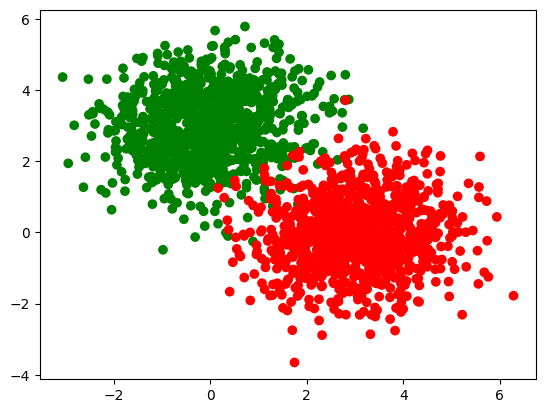

In [61]:
# Map the booleans to colors
colors = np.where(targets[:, 0], 'red', 'green')

plt.scatter(inputs[:, 0], inputs[:, 1], c=colors)
plt.show()

In [ ]:
input_dim = 2
output_dim = 1

W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.8685819],
       [0.9096402]], dtype=float32)>

In [40]:
def model(inputs):
    # prediction = [[w1], [w2]] • [x, y] + b = w1 * x+ w2 * y + b
    return tf.matmul(inputs, W) + b

In [41]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [42]:
def training_step(inputs, targets):
    learning_rate = 0.1
    with tf.GradientTape() as tape:
        predictions = model(inputs) # forward pass
        loss = square_loss(predictions, targets)
        
    # find gradients of loss with respect to W and b
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss,[W, b])
    
    # Update W and b by descending against the gradient
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [43]:
# For simplicity, we do batch training instead of mini-batch training. We run each training
# step (gradient computation and weight update) on the entire data, rather than iterate
# over the data in small batches.
for step in range(35):
    loss = training_step(inputs, targets)
    print('Loss at step %d: %.4f' % (step, loss))

Loss at step 0: 1.3210
Loss at step 1: 0.1964
Loss at step 2: 0.1157
Loss at step 3: 0.1063
Loss at step 4: 0.1020
Loss at step 5: 0.0984
Loss at step 6: 0.0949
Loss at step 7: 0.0917
Loss at step 8: 0.0887
Loss at step 9: 0.0858
Loss at step 10: 0.0832
Loss at step 11: 0.0807
Loss at step 12: 0.0783
Loss at step 13: 0.0761
Loss at step 14: 0.0741
Loss at step 15: 0.0721
Loss at step 16: 0.0703
Loss at step 17: 0.0686
Loss at step 18: 0.0670
Loss at step 19: 0.0655
Loss at step 20: 0.0641
Loss at step 21: 0.0628
Loss at step 22: 0.0615
Loss at step 23: 0.0604
Loss at step 24: 0.0593
Loss at step 25: 0.0582
Loss at step 26: 0.0573
Loss at step 27: 0.0564
Loss at step 28: 0.0555
Loss at step 29: 0.0547
Loss at step 30: 0.0540
Loss at step 31: 0.0533
Loss at step 32: 0.0526
Loss at step 33: 0.0520
Loss at step 34: 0.0514


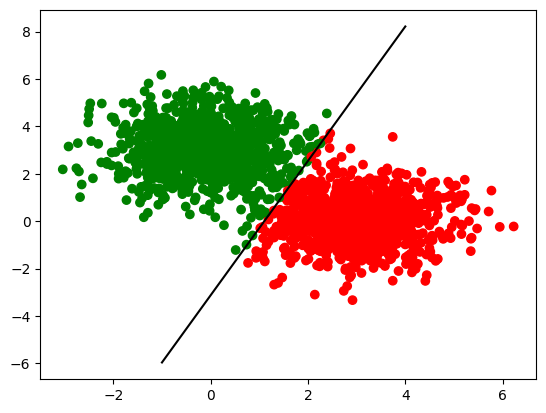

In [ ]:
# # plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
# colors = np.array(['green', 'red'])[targets[:, 0].astype(int)]
# plt.scatter(inputs[:, 0], inputs[:, 1], c=colors)
# plt.show()

# Display predictions and decision boundary
predictions = model(inputs)

# Mask predictions as boolean: > 0.5 maps to True while <= 0.5 maps to False
mask = (predictions[:, 0].numpy() > 0.5)

# Map the booleans to colors
colors = np.where(mask, 'red', 'green')

plt.scatter(inputs[:, 0], inputs[:, 1], c=colors)
x = np.linspace(-1, 4, 100)
y = -W[0] / W[1]* x + (0.5 - b) / W[1]
plt.plot(x, y, color='black')
plt.show()

## Problem 4

In [81]:
# def square_loss_p4(targets, predictions):
#     per_sample_losses = tf.square(targets - predictions)
#     return tf.reduce_mean(per_sample_losses)

def model_p4(input):
    """
    Computes the prediction for problem 4.
    The cost function is: f(x) = 0.2x - 0.5
    """
    return input * 0.2 - 0.5

In [78]:
def training_step_p4(inputs, targets, w, b):
    learning_rate = 0.1
    with tf.GradientTape() as tape:
        predictions = model_p4(inputs)
        loss = square_loss(predictions, targets)
        
    # find gradients of loss with respect to W and b
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss,[w, b])
    
    # Update W and b by descending against the gradient
    w.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss, w, b

In [79]:
num_data_points = 100

# Initialize random generator with a seed to make it deterministic
np.random.seed(42)

# Generate a feature of 100 data points for which are uniformly distributed between 0 and 8
x = np.random.uniform(0, 8, num_data_points).astype(np.float32)

# Generate normal Gaussian noise of standard deviation 0.2
noise = np.random.normal(0, 0.2, num_data_points).astype(np.float32)

# Generate target y:  0.2x - 0.5 + noise
y = 0.2 * x - 0.5 + noise

In [85]:
# Initialize weight and bias for the training to 0
# w = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))
# b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

# steps = 500
# for step in range(steps):
#     loss, w, b = training_step_p4(x, y, w, b)
#     if step % 50 == 0:
#         print('Loss at step %d: %.4f' % (step, loss))

# Convert to tensors
x_tensor = tf.constant(x, dtype=tf.float32)
y_tensor = tf.constant(y, dtype=tf.float32)

# Step 2: Initialize parameters for the line y = ax + b
a = tf.Variable(tf.random.normal([]))
b = tf.Variable(tf.random.normal([]))

# Step 3: Define loss function
def mse_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# Step 4: Training loop with GradientTape
learning_rate = 0.01
epochs = 500

for epoch in range(epochs):
    with tf.GradientTape() as tape:
        y_pred = a * x_tensor + b
        loss = mse_loss(y_tensor, y_pred)
    # Compute gradients
    grads = tape.gradient(loss, [a, b])
    # Update parameters
    a.assign_sub(learning_rate * grads[0])
    b.assign_sub(learning_rate * grads[1])
    
    if epoch % 50 == 0:
        print(f"Epoch {epoch}: loss={loss.numpy():.4f}, a={a.numpy():.4f}, b={b.numpy():.4f}")

print("\nFinal parameters:")
print(f"a = {a.numpy():.4f}, b = {b.numpy():.4f}")

Epoch 0: loss=2.4686, a=0.1662, b=-1.3663
Epoch 50: loss=0.1585, a=0.3165, b=-1.1200
Epoch 100: loss=0.1051, a=0.2858, b=-0.9608
Epoch 150: loss=0.0744, a=0.2624, b=-0.8399
Epoch 200: loss=0.0566, a=0.2447, b=-0.7480
Epoch 250: loss=0.0463, a=0.2312, b=-0.6781
Epoch 300: loss=0.0404, a=0.2209, b=-0.6250
Epoch 350: loss=0.0369, a=0.2132, b=-0.5847
Epoch 400: loss=0.0350, a=0.2072, b=-0.5540
Epoch 450: loss=0.0338, a=0.2027, b=-0.5307

Final parameters:
a = 0.1994, b = -0.5133


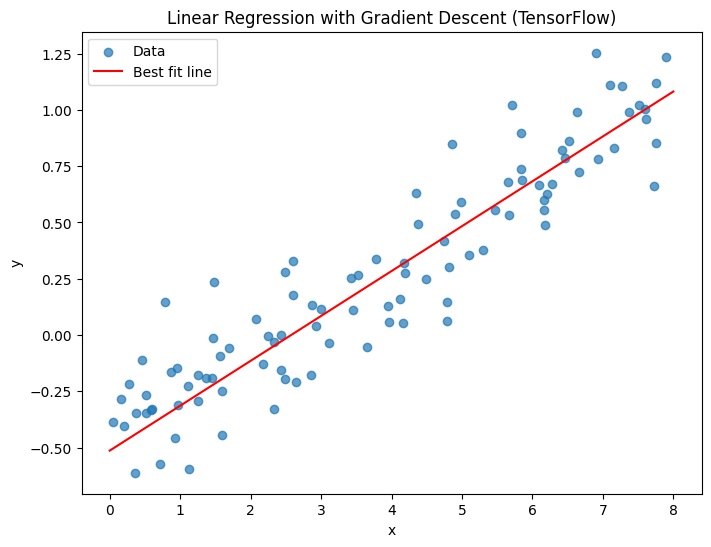

In [91]:
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label="Data", alpha=0.7)
x_line = np.linspace(0, 8, 100).astype(np.float32)
y_line = a.numpy() * x_line + b.numpy()
plt.plot(x_line, y_line, 'r-', label="Best fit line")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression with Gradient Descent (TensorFlow)")
plt.legend()
plt.show()